# 1. Что такое асинхронное программирование

Асинхронное программирование — это концепция программирования, при применении которой запуск длительных операций происходит без ожидания их завершения и не блокирует дальнейшее выполнение программы.

### 1.1. Асинхронные задачи

Выполнение асинхронного вызова функции часто приводит к предоставлении вызывающей стороне некоего идентификатора запроса, который вызывающая сторона может использовать для того, чтобы проверить состояние запроса или получить результаты. Такие идентификаторы часто называют объектами, ждущими результата выполнения задачи (**future, объект Future, преднамеченное значение, «футура»**).

***Объект future***: идентификатор асинхронного вызова функции, позволяющий проверять состояние вызова и получать результаты работы функции.

>  ***Асинхронная задача***: этот термин используется для обозначения сущности, представляющей собой объединение асинхронного вызова функции и порождённого этим вызовом объекта Future.


### 1.2. Асинхронное программирование

>  ***Асинхронное программирование***: использование особых приёмов асинхронного выполнения кода — таких, как выполнение асинхронных задач или вызовов функций.

Комбинация неблокирующего ввода/вывода с асинхронным программированием так распространена, что её обычно называют асинхронным вводом/выводом.

>  ***Асинхронный ввод/вывод***: условное сокращение, которое означает комбинацию асинхронного программирование и неблокирующей обработки ввода/вывода.


### 1.3. Асинхронное программирование в Python

>  ***Asyncio***: асинхронная среда программирования, представленная в Python благодаря модулю asyncio.



# 2. Что такое asyncio

Если говорить конкретнее, то понятие «asyncio» имеет отношение к двум элементам:
1. Добавление модуля asyncio в стандартную библиотеку Python в Python 3.4.
2. Добавление выражений async/await в языковой арсенал Python в Python 3.5.

Всё это вместе — модуль и изменения, внесённые в язык — обеспечило возможность разработки Python-программ, поддерживающих конкурентное выполнение кода, основанное на корутинах, позволило использовать неблокирующий ввод/вывод и механизмы асинхронного программирования.

### 2.1. Изменения, внесённые в Python для добавления в язык поддержки корутин

Корутина — это функция, выполнение которой можно приостановить и возобновить.

> ***Корутина***: корутины — это более общая форма подпрограмм. Подпрограммы имеют одну точку входа и одну точку выхода. А корутины поддерживают множество точек входа, выхода и возобновления их выполнения.


```python
# определение корутины
async def custom_coro():
    # ...

# создание объекта корутины
coro = custom_coro()
# Вызов функции корутины создаёт объект корутины, в основе которого лежит новый класс. При этом функция корутины не выполняется.
# Корутина может запустить другую корутину посредством выражения await.


# Это выражение приостанавливает выполнение вызывающей стороны и планирует выполнение целевого объекта.
# приостановить выполнение кода и запланировать выполнение целевого объекта
await custom_coro()

```

Асинхронный итератор — это итератор, который выдаёт объекты, допускающие ожидание.

>  ***Асинхронный итератор***: объект, который реализует методы aiter() и anext(). Метод anext() должен возвращать объект, допускающий ожидание. Конструкция async for разрешает объекты, допускающие ожидание, возвращённые методом anext() асинхронного итератора до тех пор, пока он не вызовет исключение StopAsyncIteration.


```python
# обход асинхронного итератора
async for item in async_iterator:
    print(item)
```


> ***Асинхронный менеджер контекста*** — это менеджер контекста, который может приостанавливать выполнение в своих методах enter и exit.

### 2.2. Модуль asyncio

***Asyncio*** — это библиотека для написания конкурентного кода с использованием синтаксических конструкций async/await.


# 3. Когда стоит использовать модуль asyncio

### 3.1. Причины использования asyncio в Python-проектах

1. Конкурентность, основанная на потоках, доступна Python-программистам благодаря модулю threading, она поддерживается на уровне операционной системы, в которой работает Python-программа. Такая конкурентность подходит для обработки блокирующих операций ввода/вывода, таких, как запись и чтение данных при работе с файлами, сокетами, устройствами.

2. Конкурентность, основанная на процессах, реализуется на основе механизмов из модуля multiprocessing. Её, как и в случае с потоками, поддерживает операционная система. Она подходит для решения задач, скорость выполнения которых привязана к производительности CPU, но которые при этом не предусматривают интенсивного межпроцессного взаимодействия. Это, например, тяжёлые вычислительные задачи.

3. Корутины — это альтернатива потокам и процессам. Программисту их предоставляет сам язык Python и среда его выполнения (стандартный интерпретатор), а их поддержка основана на модуле asyncio. Они подходят для обработки неблокируюих операций ввода/вывода с использованием подпроцессов и сокетов. Впрочем, заниматься блокирующим вводом/выводом и решать тяжёлые вычислительные задачи можно, используя подход, имитирующий решение неблокирующих задач, когда в недрах программы всё сводится к применению потоков и процессов.


Потоки и процессы позволяют достичь многозадачности через механизмы операционной системы, которая решает — какой поток или процесс надо запустить, когда его надо запустить, сколько процессорного времени ему дать. Операционная система быстро переключается между потоками и процессами, приостанавливая те, которые отработали отведённое им время, и возобновляя выполнение тех, которым выделено время на работу. Это называют ***вытесняющей многозадачностью***.

А корутины в Python реализуют альтернативный подход к многозадачности — ***кооперативную многозадачность***.


ПРИЧИНЫ:
1. Кооперативная многозадачность это — альтернативный, интересный и мощный подход к конкурентности, отличающийся от подхода, основанного на потоках и процессах.
2. Программист может решить применять корутины из-за их масштабируемости.
3. Асинхронное програмирование как таковое
4. Неблокирующий ввод/вывод



# 4. Корутины в Python

### 4.1. Что такое корутина

> ***Корутина*** — это метод, который можно приостановить, когда у нас имеется задача, выполнение которой может занять много времени. Потом, когда эта задача будет завершена, метод можно возобновить.

Отличие функций(подпрограмм) от корутин в том что корутины могут самостоятельно приостанавливать и возобновлять своё выполнение много раз до возврата значения и выхода из них.


### 4.3. Сравнение корутин и генераторов

Мы можем считать генераторы корутинами особого типа, на основе которых реализуется кооперативная многозадачность в циклах.

> Генераторы, ещё известные как полукорутины, это — подмножество корутин.


### 4.4. Сравнение корутин и задач

* Подпрограммы и корутины могут представлять в программах «задачи».

* Но в Python есть особый объект, представляющий задачу. Это — объект asyncio.Task

> Объект, похожий на объект Future, который отвечает за выполнение Python-корутин. […] Задачи используются для выполнения корутин в цикле событий.

* Корутину можно обернуть в объект asyncio.Task и выполнить независимо — в противовес её выполнению напрямую, внутри другой корутины. Объект Task даёт средства для асинхронного выполнения корутин.

***Задача***: обёрнутая корутина, которая может быть выполнена независимо.

* Это позволяет обёрнутой корутине выполняться в фоновом режиме. Вызывающая корутина может продолжить выполнять инструкции вместо того, чтобы ожидать возврата управления от другой корутины.

* Объект Task не может существовать сам по себе. В него обязательно должна быть обёрнута корутина.

* В результате получается, что объект Task, представляющий задачу — это корутина, но корутина — это не задача.


### 4.5. Сравнение корутин и потоков

Поток — это объект, который создаёт и которым управляет операционная система. Он представлен в Python объектом threading.Thread.

***Поток***: им управляет операционная система, он представлен Python-объектом.

> Цена запуска корутины — это цена вызова функции. После того, как корутина активируется, она использует меньше 1 Кб памяти до тех пор, пока не отработает.

Корутины выполняются в пределах одного потока, в результате один поток может выполнять код множества корутин.


### 4.6. Сравнение корутин и процессов

Python-процесс — это отдельный экземпляр Python-интерпретатора.

Процессы, как и потоки, создаёт операционная система, она же ими управляет. Они представлены объектом multiprocessing.Process.

***Процесс***: им управляет операционная система, он представлен Python-объектом.


Старый подход к асинхронности в питоне:

```python
# объявление собственной корутины в Python 3.4
@asyncio.coroutine
def custom_coro():
    # приостановка и выполнение другой корутины
    yield from asyncio.sleep(1)
```


Мы можем сказать, что корутины были добавлены в Python в виде стандартных возможностей языка в версии 3.5.

Сюда входят изменения, внесённые в язык, такие, как выражения 
```python
async def, await, async with и async for, а так же — тип coroutine.
```


# 5. Определение, создание и запуск корутин

### 5.1. Как определить корутину

> Функция корутины: функция, которая возвращает объект корутины.
> Функцию корутины можно определить,пользуясь командой async def,
> она может содержать ключевые слова await, async for и async with.

In [7]:
import asyncio

# определение корутины
async def custom_coro():
    # ожидание другой корутины
    await asyncio.sleep(1)

### 5.2. Как создать корутину

```python
# создание корутины
coro = custom_coro()
```

У Python-объекта корутины есть методы — такие, как send() и close(). Он имеет тип coroutine.

In [2]:
import asyncio
# проверка типа корутины
 
# определение корутины
async def custom_coro():
    # ожидание другой корутины
    print('hello from async world')
    await asyncio.sleep(1)
 
# создание корутины
coro = custom_coro()
# проверка типа корутины
print(type(coro))

await coro

<class 'coroutine'>
hello from async world


### 5.3. Как запустить корутину из Python-кода

In [7]:
import asyncio

# определение корутины
async def custom_coro():
    # ожидание другой корутины
    print('Hi from corutine')
    await asyncio.sleep(1)
    return 'RESULT'
 
# главная корутина
async def main():
    # выполнение нашей корутины
    await custom_coro()
 
# запуск программы, основанной на корутинах
# asyncio.run(main())

await main()

Hi from corutine


# 6. Цикл событий asyncio

### 6.1. Что такое цикл событий asyncio

Цикл событий — это среда для выполнения корутин в одном потоке.

> Asyncio — это библиотека для выполнения этих корутин в асинхронной манере с использованием модели конкурентности, известной под названием «однопоточный цикл событий».

Он отвечает за решение множества задач. Вот некоторые из них:

1. Выполнение корутин.
2. Выполнение коллбэков.
3. Выполнение сетевых операций ввода/вывода.
4. Выполнение подпроцессов.


### 6.2. Запуск цикла событий и получение ссылки на его объект

Обычно в asyncio-приложениях ссылки на объекты циклов событий получают, вызывая функцию asyncio.run().

> Эта функция всегда создаёт новый цикл событий и в конце завершает его работу. Её следует использовать как основную точку входа для asyncio-программ, в идеале её нужно вызывать в программах лишь один раз.

Если цикл событий asyncio уже выполняется — доступ к нему можно получить посредством функции 

```python
asyncio.get_running_loop()
```

### 6.4. Зачем может понадобиться доступ к циклу событий

Например:

* Для мониторинга хода выполнения задач.
* Для выдачи и получения результатов работы задач.
* Для запуска одноразовых задач.


# 7. Создание и запуск asyncio-задач

### 7.1. Что такое asyncio-задача

***Task*** — это объект, который отвечает за планирование выполнения asyncio-корутин и за их независимый запуск.

### 7.2. Как создать задачу


In [3]:
coro = custom_coro()
# создание задачи из корутины
task = asyncio.create_task(coro)

hello from async world


Вот что здесь происходит:

1. Корутина оборачивается в экземпляр Task.
2. Планируется выполнение задачи в текущем цикле событий.
3. Возвращается экземпляр Task

In [8]:
# получить текущий цикл событий
loop = asyncio.get_event_loop()
# создать задачу и запланировать её выполнение
task = loop.create_task(custom_coro())

Hi from corutine


In [11]:
task.result()

'RESULT'

Жизненный цикл задачи можно представить себе так:

1. Создана (Created).
2. Запланирована (Scheduled).
3. Выполняется (Running).
4. Завершена (Done).



In [14]:
asyncio.current_task()

<Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/ilamasliev/Library/Caches/pypoetry/virtualenvs/algo-test-25np0PMf-py3.11/lib/python3.11/site-packages/ipykernel/kernelbase.py:513> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/ilamasliev/Library/Caches/pypoetry/virtualenvs/algo-test-25np0PMf-py3.11/lib/python3.11/site-packages/tornado/ioloop.py:685]>

In [17]:
# пример получения текущей задачи из главной корутины
import asyncio
# определение главной корутины
async def main():
    # вывод сообщения
    print('main coroutine started')
    # получение текущей задачи
    task = asyncio.current_task()
    # вывод сведений о ней
    print(task)
# запуск asyncio-программы
asyncio.create_task(main())

<Task pending name='Task-10' coro=<main() running at /var/folders/jk/nrp563kj0jx31d5l4bc19j5c0000gn/T/ipykernel_61324/2760077547.py:4>>

main coroutine started
<Task pending name='Task-10' coro=<main() running at /var/folders/jk/nrp563kj0jx31d5l4bc19j5c0000gn/T/ipykernel_61324/2760077547.py:10>>


In [18]:
asyncio.all_tasks()

{<Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/ilamasliev/Library/Caches/pypoetry/virtualenvs/algo-test-25np0PMf-py3.11/lib/python3.11/site-packages/ipykernel/kernelbase.py:513> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/ilamasliev/Library/Caches/pypoetry/virtualenvs/algo-test-25np0PMf-py3.11/lib/python3.11/site-packages/tornado/ioloop.py:685]>}

# 8. Работа с задачами и получение сведений о них

### 8.1. Жизненный цикл задачи

Жизненный цикл задачи можно представить себе так:

1. Создана (Created).
2. Запланирована (Scheduled).
3. Выполняется (Running).
4. Завершена (Done).

Обратите внимание на то, что такие пункты нашего списка, как «Приостановлена», 
«Вернула результат», «Выдала исключение» и «Отменена» — это, сами по себе, не состояния задачи.
Это — важные переходные моменты жизненного цикла выполняющейся задачи.

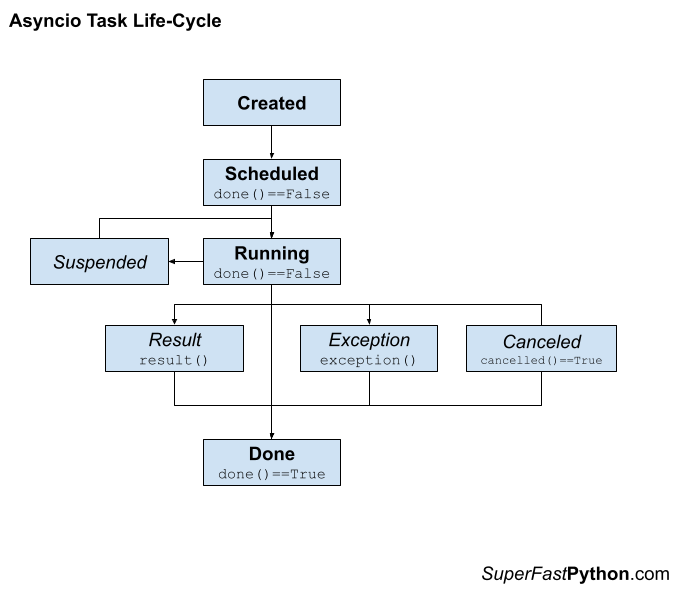

### 8.2. Как проверить состояние задачи

In [ ]:
#...
# проверка на завершение выполнения задачи
if task.done():
    # ...
    pass

# ...
# проверка на отмену выполнения задачи
if task.cancelled():
    # ...
    pass


### 8.3. Как получить результат выполнения задачи

In [ ]:
# ...
try:
    # получение возвращённого значения из обёрнутой корутины
    value = task.result()
except Exception:
    # задача завершилась неудачно, результата нет



# интерфейсы состояния задачи
task.done() - проверка на завершение выполнения задачи
task.cancelled() - проверка на отмену выполнения задачи
value = task.result() - получение возвращённого значения из обёрнутой корутины
exception = task.exception() - получение исключения, вызванного задачей


### 8.6. Как использовать коллбэки при работе с задачами

In [14]:
import asyncio

async def my_coro():
    await asyncio.sleep(3)
    return 'Im alive!'

def my_coro_callback(task):
    print(task)
    print('Im here to callback u!')


my_coro_task = asyncio.create_task(my_coro())
my_coro_task.add_done_callback(my_coro_callback)

await my_coro_task

<Task finished name='Task-19' coro=<my_coro() done, defined at /tmp/ipykernel_4568/2809363325.py:3> result='Im alive!'>
Im here to callback u!


'Im alive!'

In [15]:
# FULL example of adding a done callback function to a task
import asyncio
 
def callback(task):
    print('Task is done')
 
async def task_coroutine():
    print('executing the task')
    await asyncio.sleep(1)
 
async def main():
    print('main coroutine started')
    task = asyncio.create_task(task_coroutine())
    task.add_done_callback(callback)
    await task
    print('main coroutine done')

# asyncio.run(main())
await main()

main coroutine started
executing the task
Task is done
main coroutine done


In [ ]:
# Custom asyncio example
import asyncio

async def my_coro():
    await asyncio.sleep(3)
    return 'Im alive!'

def my_coro_callback(task):
    print(task)
    print('Im here to callback u!')
    print(task.result())

async def main():
    task = asyncio.create_task(my_coro())
    task.add_done_callback(my_coro_callback)
    await task

asyncio.run(main())

# 9. Текущие и выполняющиеся задачи

In [16]:
# пример, где запускают множество задач, а после этого получают к ним доступ
import asyncio
# корутина для задач
async def task_coroutine(value):
    # вывод сообщения
    print(f'task {value} is running')
    # краткая блокировка
    await asyncio.sleep(1)
# определение главной корутины
async def main():
    # вывод сообщения
    print('main coroutine started')
    # запуск нескольких задач
    started_tasks = [asyncio.create_task(task_coroutine(i)) for i in range(10)]
    # выделение времени, необходимого на то, чтобы некоторые из задач запустились
    await asyncio.sleep(0.1)
    # получение всех задач
    tasks = asyncio.all_tasks()
    # вывод сведений обо всех задачах
    for task in tasks:
        print(f'> {task.get_name()}, {task.get_coro()}')
    # ждём завершения всех задач
    for task in started_tasks:
        await task
# запуск asyncio-программы
asyncio.create_task(main())

<Task pending name='Task-22' coro=<main() running at /tmp/ipykernel_4568/2850099599.py:10>>

main coroutine started
task 0 is running
task 1 is running
task 2 is running
task 3 is running
task 4 is running
task 5 is running
task 6 is running
task 7 is running
task 8 is running
task 9 is running
> Task-3, <coroutine object Kernel.dispatch_queue at 0x7f3458848890>
> Task-26, <coroutine object task_coroutine at 0x7f34540ab0d0>
> Task-28, <coroutine object task_coroutine at 0x7f343e54c190>
> Task-30, <coroutine object task_coroutine at 0x7f343e54c040>
> Task-31, <coroutine object task_coroutine at 0x7f343e54c900>
> Task-24, <coroutine object task_coroutine at 0x7f34540aa6c0>
> Task-22, <coroutine object main at 0x7f343e54c5f0>
> Task-27, <coroutine object task_coroutine at 0x7f34540aa420>
> Task-23, <coroutine object task_coroutine at 0x7f34588495b0>
> Task-32, <coroutine object task_coroutine at 0x7f343e54c890>
> Task-29, <coroutine object task_coroutine at 0x7f343e54c820>
> Task-25, <coroutine object task_coroutine at 0x7f34540aace0>


# 10. Конкурентный запуск нескольких корутин

### 10.1. Функция asyncio.gather()
Функция asyncio.gather() позволяет вызывающей стороне группировать объекты, допускающие ожидание.

```python
awaitable asyncio.gather(*aws, return_exceptions=False)
```

Применение функции gather() даёт больше возможностей, чем обычное ожидание завершения работы задач.
Она позволяет рассматривать группу объектов, допускающих ожидание, как один такой объект.

Вот какие возможности это открывает:

* Запуск группы объектов, допускающих ожидание, и ожидание завершения их работы с использованием выражения await.
* Получение результатов от всех сгруппированных объектов, допускающих ожидание, путём вызова в нужное время метода result().
* Выполнение группы объектов, допускающих ожидание, может быть отменено с помощью метода cancel().
* Проверка того, завершена ли работа всех сгруппированных объектов, допускающих ожидание, может быть выполнена с помощью метода done().
* Выполнить функции-коллбэки можно только тогда, когда все задачи в группе завершат работу.


Вспомните о том, что в роли объекта, допускающего ожидание, может выступать корутина, объект Future, или объект Task.

```python
# однострочный вариант запуска задач и получения результатов
results = await asyncio.gather(coro1(), coro2())
```

### 10.3. Пример использования функции gather() при работе со списком из нескольких корутин

При работе с группами корутин распространён такой подход: заранее создают несколько корутин, а позже передают их функции gather().

In [31]:
import asyncio

async def cl_cs_coro(val):
    print(f'Coro with {val} started..')
    await asyncio.sleep(val)
    print(f'Coro with {val} done..')
    return val


async def main():
    print('main starting')
    tasks_to_run = [cl_cs_coro(value*0.4) for value in range(1, 10)]
    res = await asyncio.gather(*tasks_to_run)
    print(f'main done, result {res}')

asyncio.create_task(main())

<Task pending name='Task-96' coro=<main() running at /tmp/ipykernel_4568/377264748.py:10>>

main starting
Coro with 0.4 started..
Coro with 0.8 started..
Coro with 1.2000000000000002 started..
Coro with 1.6 started..
Coro with 2.0 started..
Coro with 2.4000000000000004 started..
Coro with 2.8000000000000003 started..
Coro with 3.2 started..
Coro with 3.6 started..
Coro with 0.4 done..
Coro with 0.8 done..
Coro with 1.2000000000000002 done..
Coro with 1.6 done..
Coro with 2.0 done..
Coro with 2.4000000000000004 done..
Coro with 2.8000000000000003 done..
Coro with 3.2 done..
Coro with 3.6 done..
main done, result [0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4000000000000004, 2.8000000000000003, 3.2, 3.6]


# 11. Ожидание выполнения некоего условия для коллекции задач

Функция asyncio.wait() позволяет организовать ожидание выполнения некоего условия для нескольких asyncio-задач.

In [38]:
import asyncio

async def cl_cs_coro(val):
    print(f'Coro with {val} started..')
    await asyncio.sleep(val)
    print(f'Coro with {val} done..')
    return val


async def main():
    print('main starting')
    tasks_to_run = [asyncio.create_task(cl_cs_coro(value*0.4)) for value in range(1, 10)]
    done, pending = await asyncio.wait(tasks_to_run, return_when=asyncio.ALL_COMPLETED)
    # done, pending = await asyncio.wait(tasks_to_run, return_when=asyncio.FIRST_COMPLETED)
    # done, pending = await asyncio.wait(tasks_to_run, return_when=asyncio.FIRST_EXCEPTION)
    print(f'main done, result {done}')

asyncio.create_task(main())

<Task pending name='Task-157' coro=<main() running at /tmp/ipykernel_4568/4169446425.py:10>>

main starting
Coro with 0.4 started..
Coro with 0.8 started..
Coro with 1.2000000000000002 started..
Coro with 1.6 started..
Coro with 2.0 started..
Coro with 2.4000000000000004 started..
Coro with 2.8000000000000003 started..
Coro with 3.2 started..
Coro with 3.6 started..
Coro with 0.4 done..
Coro with 0.8 done..
Coro with 1.2000000000000002 done..
Coro with 1.6 done..
Coro with 2.0 done..
Coro with 2.4000000000000004 done..
Coro with 2.8000000000000003 done..
Coro with 3.2 done..
Coro with 3.6 done..
main done, result {<Task finished name='Task-158' coro=<cl_cs_coro() done, defined at /tmp/ipykernel_4568/4169446425.py:3> result=0.4>, <Task finished name='Task-159' coro=<cl_cs_coro() done, defined at /tmp/ipykernel_4568/4169446425.py:3> result=0.8>, <Task finished name='Task-166' coro=<cl_cs_coro() done, defined at /tmp/ipykernel_4568/4169446425.py:3> result=3.6>, <Task finished name='Task-160' coro=<cl_cs_coro() done, defined at /tmp/ipykernel_4568/4169446425.py:3> result=1.20000000

# 12. Ожидание выполнения корутины с указанием лимита времени

Можно организовать ожидание завершения выполнения asyncio-задачи или корутины с указанием лимита времени. Делается это с помощью функции asyncio.wait_for()

### 12.1 Функция asyncio.wait_for()
Функция asyncio.wait_for() позволяет вызывающей стороне ожидать завершения выполнения asyncio-задачи или корутины с указанием тайм-аута.

* Если тайм-аут не задан — эта функция будет ожидать завершения задачи.
* Если тайм-аут задан и время истекло до завершения выполнения задачи — задача отменяется.

In [46]:
# пример ожидания выполнения корутины с тайм-аутом
from random import random
import asyncio
 
# корутина, которая будет выполняться в новой задаче
async def task_coro(arg):
    # генерирование случайного значения в диапазоне между 1 и 2
    value = 1 + random()
    # вывод сообщения
    print(f'>task got {value}')
    # блокировка на некоторое время
    await asyncio.sleep(value)
    # вывод сообщения о завершении работы
    print('>task done')
 
# главная корутина
async def main():
    # создание задачи
    task = task_coro(1)
    # запуск задачи и ожидание её завершения с тайм-аутом
    try:
        await asyncio.wait_for(task, timeout=0.2)
    except asyncio.TimeoutError:
        print('Gave up waiting, task canceled')
 
# запуск asyncio-программы
asyncio.create_task(main())

<Task pending name='Task-177' coro=<main() running at /tmp/ipykernel_4568/1410128800.py:17>>

>task got 1.6518542852524694
Gave up waiting, task canceled


# 13. Защита задач от отмены их выполнения

Выполнение asyncio-задачи можно отменить, вызывав её метод cancel().

Задачу можно защитить от отмены, обернув её в вызов функции asyncio.shield().

### 13.1. Функция asyncio.shield()

Функция asyncio.shield() оборачивает объект, допускающий ожидание, в объект Future, который будет принимать запросы на отмену выполнения обёрнутого в него объекта.

In [63]:
# пример использования функции asyncio.shield() для защиты задачи от отмены
import asyncio
 
# определение простой корутины
async def simple_task(number):
    # блокировка на некоторое время
    await asyncio.sleep(1)
    # возврат аргумента
    return number
 
# корутина, отменяющая переданную ей задачу через некоторое время
async def cancel_task(task):
    # блокировка на некоторое время
    await asyncio.sleep(0.2)
    # отмена задачи
    was_cancelled = task.cancel()
    print(f'cancelled: {was_cancelled}')
 
# главная корутина
async def main():
    # создание корутины
    coro = simple_task(1)
    # создание задачи
    task = asyncio.create_task(coro)
    # создание защищённой задачи
    shielded = asyncio.shield(task)
    # создание задачи, отменяющей переданную ей задачу
    asyncio.create_task(cancel_task(shielded))
    # обработка отмены
    try:
        # ожидание завершения работы защищённой задачи
        result = await shielded
        # вывод сведений о полученных результатах
        print(f'>got: {result}')
    except asyncio.CancelledError:
        print('shielded was cancelled')
    # ожидание
    await asyncio.sleep(1)
    # вывод сведений о задачах
    print(f'shielded: {shielded}')
    print(f'task: {task}')
    print(task.result())
 
# запуск программы
asyncio.create_task(main())

<Task pending name='Task-224' coro=<main() running at /tmp/ipykernel_4568/388078025.py:20>>

cancelled: True
shielded was cancelled
shielded: <Future cancelled>
task: <Task finished name='Task-225' coro=<simple_task() done, defined at /tmp/ipykernel_4568/388078025.py:5> result=1>
1


# 14. Запуск блокирующих задач в asyncio-программах

Если в asyncio-программе запускается блокирующая задача — она останавливает весь цикл событий, не давая выполняться любым другим корутинам.

Блокирующие вызовы в asyncio-программах можно выполнять асинхронно, пользуясь функциями 

```python
asyncio.to_thread()

loop.run_in_executor()
```

### 14.1. Зачем может понадобиться запуск блокирующих задач в asyncio-программах?


Такая необходимость может возникать по множеству причин. Вот некоторые из них:

* Для решения задачи, зависящей от производительности CPU, например — выполняющей какие-то вычисления.
* Для выполнения блокирующей операции, зависящей от подсистемы ввода/вывода. Это может быть чтение или запись файла.
* Для вызова функции из сторонней библиотеки, которая ещё не поддерживает механизмы модуля asyncio.

In [3]:
import asyncio
import time
 
# блокирующая задача, зависящая от подсистемы ввода/вывода
def blocking_task():
    # вывод сообщения
    print('Task starting')
    # блокировка на некоторое время
    time.sleep(2)
    # вывод сообщения
    print('Task done')
 
# главная корутина
async def main():
    # вывод сообщения
    print('Main running the blocking task')
    # создание корутины для блокирующей задачи
    coro = asyncio.to_thread(blocking_task)
    # планирование задачи
    task = asyncio.create_task(coro)
    # вывод сообщения
    print('Main doing other things')
    # позволяем запланированной задаче запуститься
    await asyncio.sleep(0)
    # ожидание завершения задачи
    await task
 
# запуск asyncio-программы
asyncio.create_task(main())

<Task pending name='Task-8' coro=<main() running at /tmp/ipykernel_6527/1097048080.py:14>>

Main running the blocking task
Main doing other things
Task starting
Task done


In [6]:
import asyncio
import time


def blocking_io():
    print(f"start blocking_io at {time.strftime('%X')}")
    # Note that time.sleep() can be replaced with any blocking
    # IO-bound operation, such as file operations.
    time.sleep(1)
    print(f"blocking_io complete at {time.strftime('%X')}")

async def main():
    print(f"started main at {time.strftime('%X')}")

    await asyncio.gather(
        asyncio.to_thread(blocking_io),
        asyncio.sleep(1))

    print(f"finished main at {time.strftime('%X')}")


asyncio.create_task(main())

<Task pending name='Task-10' coro=<main() running at /tmp/ipykernel_6527/2878677315.py:12>>

started main at 06:23:38
start blocking_io at 06:23:38
blocking_io complete at 06:23:39
finished main at 06:23:39


# 15. Асинхронные итераторы

### 15.1. Что такое асинхронные итераторы

Асинхронный итератор — это объект, который реализует методы aiter() и anext()

In [9]:
# пример работы с асинхронным итератором с применением цикла async for
import asyncio
 
# определение асинхронного итератора
class AsyncIterator():
    # конструктор, объявление некоторых данных, относящихся к состоянию объекта
    def __init__(self):
        self.counter = 0
 
    # создание экземпляра итератора
    def __aiter__(self):
        return self
 
    # возврат следующего объекта, допускающего ожидание
    async def __anext__(self):
        # проверка на то, есть ли ещё невозвращённые элементы
        if self.counter >= 10:
            raise StopAsyncIteration
        # инкрементирование счётчика
        self.counter += 1
        # имитация работы
        await asyncio.sleep(1)
        # возврат значения счётчика
        return self.counter
 
# главная корутина
async def main():
    # обход асинхронного итератора с помощью цикла async for
    async for item in AsyncIterator():
        print(item)
 
# выполнение asyncio-программы
asyncio.create_task(main())

<Task pending name='Task-13' coro=<main() running at /tmp/ipykernel_6527/595610437.py:27>>

1
2
3
4
5
6
7
8
9
10


# 16. Асинхронные генераторы

Генератор — это функция, имеющая как минимум одно выражение yield. Выполнение таких функций, как и корутин, можно приостанавливать и возобновлять.


In [15]:
# определение классического генератора
def generator():
    for i in range(10):
        yield i

gen = generator()

print(next(gen))
print(next(gen))

0
1


In [28]:
# определение асинхронного генератора
async def async_generator():
    for i in range(10):
        yield i

a_gen = async_generator()

print(await anext(a_gen))
print(await anext(a_gen))

0
1


In [31]:
# определение асинхронного генератора, в котором используется выражение await
async def async_generator():
    for i in range(10):
        # приостановка работы
        await asyncio.sleep(1)
        # выдача значения вызывающей стороне
        yield i

a_gen = async_generator()

results = [item async for item in async_generator()]
print(results)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [32]:
# пример использования асинхронного генератора в цикле async for
import asyncio
 
# определение асинхронного генератора
async def async_generator():
    # обычный цикл
    for i in range(10):
        # блокировка, имитирующая выполнение работы
        await asyncio.sleep(1)
        # выдача результата
        yield i
 
# главная корутина
async def main():
    # обход асинхронного генератора с помощью цикла async for
    async for item in async_generator():
        print(item)
 
# выполнение asyncio-программы
asyncio.create_task(main())

<Task pending name='Task-23' coro=<main() running at /tmp/ipykernel_6527/2611022575.py:14>>

0
1
2
3
4
5
6
7
8
9


# 17. Асинхронные менеджеры контекста

В asyncio-программах можно создавать и использовать асинхронные менеджеры контекста, определяя объекты, реализующие методы __aenter__() и __aexit__() в виде корутин.

Метод __enter__() определяет то, что происходит в начале блока. Например — это может быть открытие или подготовка к работе ресурса наподобие файла, сокета или пула потоков.

Метод __exit__() определяет то, что происходит при выходе из блока. Например — закрытие подготовленного ресурса.

In [ ]:
# создание асинхронного менеджера контекста, или вход в него - эквивалент async with
manager = await AsyncContextManager()
try:
    # ...
finally:
    # закрытие менеджера контекста, или выход из него
    await manager.close()

In [36]:
# Функция asynccontextmanager() модуля contextlib является декоратором, который можно использовать 
# для определения фабричной функции для асинхронного управления 
# с помощью оператора асинхронного контекста async with без необходимости 
# создавать класс или отдельные методы __aenter__() и __aexit__().


from contextlib import asynccontextmanager

@asynccontextmanager
async def get_connection():
    conn = await acquire_db_connection()
    try:
        yield conn
    finally:
        await release_db_connection(conn)

async def get_all_users():
    async with get_connection() as conn:
        return conn.query('SELECT ...')

In [41]:
# пример работы с асинхронным менеджером контекста и с async with
import asyncio
 
# определение асинхронного менеджера контекста
class AsyncContextManager:
    # вход в асинхронный менеджер контекста
    async def __aenter__(self):
        # вывод сообщения
        print('>entering the context manager')
        # блокировка на некоторое время
        await asyncio.sleep(0.5)
 
    # выход из асинхронного менеджера контекста
    async def __aexit__(self, exc_type, exc, tb):
        # вывод сообщения
        print('>exiting the context manager')
        # блокировка на некоторое время
        await asyncio.sleep(0.5)
 
# определение простой корутины
async def custom_coroutine():
    # создание и использование асинхронного менеджера контекста
    async with AsyncContextManager() as manager:
        # вывод результирующего сообщения
        print(f'within the manager')

# запуск asyncio-программы
asyncio.create_task(custom_coroutine())

<Task pending name='Task-25' coro=<custom_coroutine() running at /tmp/ipykernel_6527/3892403169.py:21>>

>entering the context manager
within the manager
>exiting the context manager


# 18. Асинхронные comprehension-выражения

In [ ]:
result = [a async for a in agenerator]

# 19. Выполнение команд в неблокирующих подпроцессах

Из программ, основанных на asyncio, можно выполнять внешние команды.
Такие команды запускаются в подпроцессах, что позволяет организовать работу, используя неблокирующие операции ввода/вывода.

### 19.1. Что собой представляет класс asyncio.subprocess.Process
Класс asyncio.subprocess.Process даёт нам представление подпроцесса, выполняемого asyncio.


Есть два инструмента для запуска внешней команды в виде подпроцесса и получения экземпляра класса Process:

* Функция `asyncio.create_subprocess_exec()` для прямого запуска команд.
* Функция `asyncio.create_subprocess_shell()` для запуска команд с помощью командной оболочки.

In [42]:
process = await asyncio.create_subprocess_exec('ls')

<Process 19646>
Algo.ipynb
AsyncIO.ipynb
design_patterns.ipynb
full_preparation.ipynb
parsers
pics
poetry.lock
pyproject.toml
SOLID.ipynb
Sorting.ipynb
Yield_examples.ipynb


In [ ]:
process_shell = await asyncio.create_subprocess_shell('ls -la')

In [44]:
process = await asyncio.create_subprocess_exec('ls', '-l')

total 332
-rw-rw-r-- 1 imasliev imasliev   9619 июн  1 05:00 Algo.ipynb
-rw-rw-r-- 1 imasliev imasliev 118384 июн  2 07:51 AsyncIO.ipynb
-rw-rw-r-- 1 imasliev imasliev  30926 мая 29 21:24 design_patterns.ipynb
-rw-rw-r-- 1 imasliev imasliev  14596 мая 28 12:30 full_preparation.ipynb
drwxrwxr-x 2 imasliev imasliev   4096 мая 28 12:30 parsers
drwxrwxr-x 2 imasliev imasliev   4096 июн  1 05:09 pics
-rw-rw-r-- 1 imasliev imasliev 122314 мая 28 12:30 poetry.lock
-rw-rw-r-- 1 imasliev imasliev    338 мая 28 12:30 pyproject.toml
-rw-rw-r-- 1 imasliev imasliev  12218 мая 28 12:30 SOLID.ipynb
-rw-rw-r-- 1 imasliev imasliev   7552 мая 28 12:30 Sorting.ipynb
-rw-rw-r-- 1 imasliev imasliev   2956 мая 28 12:30 Yield_examples.ipynb


In [ ]:
process = await asyncio.create_subprocess_exec('ls', '-l')
await process.wait()

In [46]:
# пример выполнения команды в подпроцессе в asyncio-программе
import asyncio
 
# главная корутина
async def main():
    # начало выполнения команды в подпроцессе
    process = await asyncio.create_subprocess_exec('echo', 'Hello World')
    # вывод сведений о подпроцессе
    print(f'subprocess: {process}')
 
# точка входа в программу
asyncio.create_task(main())

<Task pending name='Task-34' coro=<main() running at /tmp/ipykernel_6527/1962180326.py:5>>

subprocess: <Process 21242>Hello World



# 20. Неблокирующие потоки

Весьма полезной особенностью asyncio можно назвать возможность использования неблокирующих потоков.

### 20.1. Asyncio-потоки

В модуле asyncio имеются средства для работы с неблокирующими сокетами ввода/вывода. Эти средства представлены потоками.



In [ ]:
import asyncio
from urllib.parse import urlsplit

# получение кода HTTP/S состояния страницы
async def get_status(url):
    # разбиение URL на компоненты
    url_parsed = urlsplit(url)
    # открытие соединения
    if url_parsed.scheme == 'https':
        reader, writer = await asyncio.open_connection(url_parsed.hostname, 443, ssl=True)
    else:
        reader, writer = await asyncio.open_connection(url_parsed.hostname, 80)
    # отправка GET-запроса
    query = f'GET {url_parsed.path} HTTP/1.1\r\nHost: {url_parsed.hostname}\r\n\r\n'
    # запись запроса в сокет
    writer.write(query.encode())
    # ожидание завершения записи байтов в сокет
    await writer.drain()
    # чтение одной строки ответа
    response = await reader.readline()
    # закрытие соединения
    writer.close()
    # декодирование ответа и его очистка от ненужных пробельных символов
    status = response.decode().strip()
    # возврат результата
    return status


In [ ]:
# главная корутина
async def main():
    # список из 10 самых посещаемых сайтов, которые нужно проверить
    sites = ['https://www.google.com/',
        'https://www.youtube.com/',
        # 'https://www.facebook.com/',
        # 'https://twitter.com/',
        # 'https://www.instagram.com/',
        'https://www.baidu.com/',
        'https://www.wikipedia.org/',
        'https://yandex.ru/',
        'https://yahoo.com/',
        # 'https://www.whatsapp.com/'
        ]
    # проверка кодов HTTP-состояния для всех сайтов
    # создание всех корутин для выполнения запросов
    coros = [get_status(url) for url in sites]
    # выполнение всех корутин и ожидание завершения их работы
    results = await asyncio.gather(*coros)
    # обработка всех результатов
    for url, status in zip(sites, results):
        # вывод результатов
        print(f'{url:30}:\t{status}')

asyncio.create_task(main())

# 22. Распространённые ошибки, которые допускают разработчики при работе с asyncio

1. Попытка выполнения корутин путём их вызова.
2. Корутине не позволяют выполниться в цикле событий.
3. Использование низкоуровневого API модуля asyncio.
4. Слишком ранний выход из главной корутины.
5. Ложное предположение о том, что состояние гонок или взаимная блокировка невозможны.



# 23. FAQ
-> https://habr.com/ru/companies/wunderfund/articles/716740/